## Import the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

## 1. Data explorations

### Read data from csv file into Pandas dataframe

In [2]:
df_job_raw = pd.read_csv('salary.csv')

### How many rows (observations) and columns (attributes) does the data have? 

In [3]:
num_rows, num_cols = df_job_raw.shape
num_rows, num_cols

(1200, 13)

### What do the columns in the data mean?

In [4]:
df_job_raw.head()

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,salary
0,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,000 USD"
1,1,0,1,0,0,0,0,0,0,0,0,fresher,You'll love it
2,1,0,0,0,0,0,0,1,0,0,0,fresher,You'll love it
3,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,500 USD"
4,1,0,0,0,1,0,0,0,0,0,0,fresher,Up to 2.000 $


In [5]:
columns = df_job_raw.columns
columns

Index(['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python',
       'c++', 'golang', 'angular', 'level', 'salary'],
      dtype='object')

*With 11 columns : java, nodejs ... angular: 1 as in this job have this skill, 0 as in this job dont have this skill*  
* **java**: one of skills (programming langues or the enviroment to devolop) we have in dataset
* **nodejs**:  one of skills (programming langues or the enviroment to devolop) we have in dataset
* **reactjs**: one of skills (programming langues or the enviroment to devolop) we have in dataset 
* **ruby**:  one of skills (programming langues or the enviroment to devolop) we have in dataset
* **android**:  one of skills (programming langues or the enviroment to devolop) we have in dataset
* **ios**: one of skills (programming langues or the enviroment to devolop) we have in dataset
* **php**:  one of skills (programming langues or the enviroment to devolop) we have in dataset
* **python**: one of skills (programming langues or the enviroment to devolop) we have in dataset
* **c++**: one of skills (programming langues or the enviroment to devolop) we have in dataset
* **golang**: one of skills (programming langues or the enviroment to devolop) we have in dataset
* **angular**: one of skills (programming langues or the enviroment to devolop) we have in dataset
* **level**: this is experience of IT job
* **salary**: this is the salary offer of an IT job 

### Are there any duplicate rows in the data?

In [6]:
num_duplicate_data = df_job_raw.duplicated().sum()
num_duplicate_data

679

**Delete all the rows which is duplicated**

In [7]:
df_job = df_job_raw.drop_duplicates()

In [8]:
df_job 

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,salary
0,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,000 USD"
1,1,0,1,0,0,0,0,0,0,0,0,fresher,You'll love it
2,1,0,0,0,0,0,0,1,0,0,0,fresher,You'll love it
3,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,500 USD"
4,1,0,0,0,1,0,0,0,0,0,0,fresher,Up to 2.000 $
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,0,0,0,0,0,0,0,0,0,1,senior,"1,000 - 3,000 USD"
1193,0,0,0,0,0,0,0,0,0,0,1,senior,25 m -55 m
1194,0,0,0,0,0,0,0,0,0,0,1,senior,"2,000 - 4,000 dollar úc"
1195,0,0,0,0,0,0,0,0,0,0,1,senior,"1,000 - 2,500 USD"


**Print all the diff values that the dataset have**

In [9]:
df_job['salary'].unique()

array(['1,000 - 2,000 USD', "You'll love it", '1,000 - 2,500 USD',
       'Up to 2.000 $', '500 - 2,500 USD', 'Up to $3,000',
       '500 - 1,000 USD', '1,000 - 1,500 USD', 'Very attractive',
       '800 - 2,000 USD', 'Very attractive ', '1,500 - 1,800 USD',
       'Upto 2000$', 'Negotiable', 'Attractive salary',
       '1,000 - 3,500 USD', 'Up to 50 mil', '1,000 - 1,300 USD',
       'You will love it ', 'Up to 3500$', '800 - 2,500 USD',
       '40mil-60mil (gross)', '800 - 900 USD', '1,700 - 3,000 USD',
       '1,000 - 3,000 USD', 'Very competitive salary!',
       '1,200 - 1,700 USD', "Let's negotiate together!",
       'Very attractive!!!', '1,000 - 2,400 USD', '15 – 35m', '20 - 50m',
       '~$1500', '3,000 - 4,000 USD', '2,000 - 5,000 USD',
       '1,800 - 3,000 USD', '10m - 40m', 'Up to 30m', '1,000 - 1,800 USD',
       'Up to $2500', '500 - 2,000 USD', 'Competitive salary',
       'Up to $2100', '600 - 2,000 USD', '700 - 2,000 USD', 'Up to $3000',
       '650 - 3,000 USD', '2,00

In [10]:
df_job['level'].unique()

array(['fresher', 'junior', 'senior'], dtype=object)

**Because we have many different values in atribute name *salary* so in the next step we just accept 
the values have number**

### Proccessing 

In [11]:
import re

def proccessing(jds):
    result = []
    for i in range(len(jds)):
        level = { "fresher": 0, "junior": 1, "senior": 2 }
        
        jds[i][11] = level[jds[i][11]]
        job_description = jds[i][12]
        
        # lower case and delted all trailing whitespace 
    
        job_description = "".join(job_description.split()).lower()
        
        if job_description.find("upto") == 0:
            upto_salry = calculate_unit_salary(job_description.split("upto")[1])
            average = float(upto_salry) / 2
            jds[i][12] = average
            
            result.append(jds[i])
        else:
            range_salary = job_description.split("-")
            
            if len(range_salary) == 2:
                min_salary = calculate_unit_salary(range_salary[0])
                max_salary = calculate_unit_salary(range_salary[1])
                average = (float(min_salary) + float(max_salary)) / 2
                          
                jds[i][12] = average

                
                result.append(jds[i])
        
    return result
    

def calculate_unit_salary(salary):    
    salary_without_unit = salary.replace("usd", "").replace("$", "").replace(",", "").replace(".", "")
        
    # for in case salary dont pay with USD 
    
    salary_only_number = re.findall('[0-9]+', salary_without_unit)[0]
    
    if len(salary_only_number) != len(salary_without_unit) and len(salary_only_number) == 2:
        salary_without_unit = int(salary_only_number + "000000") * 0.000042
        return salary_without_unit
    if len(salary_only_number) >= 6:
        salary_without_unit = int(salary_only_number) * 0.000042
        return salary_without_unit
    else:
        return salary_only_number

In [12]:
range_salary = proccessing(df_job.values)

In [13]:
range_salary = np.asarray(range_salary)

In [14]:
df_job = pd.DataFrame(range_salary, columns = ['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular', 'level', 'average_salary'])

**Print new datafame**

In [15]:
df_job 

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,average_salary
0,1,0,0,0,0,0,0,0,0,0,0,0,1500.0
1,1,0,0,0,0,0,0,0,0,0,0,0,1750.0
2,1,0,0,0,1,0,0,0,0,0,0,0,1000.0
3,1,0,0,0,0,0,0,0,0,0,0,0,1500.0
4,1,0,0,0,0,0,0,0,0,0,1,0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,0,0,0,0,0,0,0,0,0,1,2,2000.0
373,0,0,0,0,0,0,0,0,0,0,1,2,1680.0
374,0,0,0,0,0,0,0,0,0,0,1,2,3000.0
375,0,0,0,0,0,0,0,0,0,0,1,2,1750.0


### What data type does each column currently have? Is there a column with a data type that is not suitable for further processing?

In [16]:
def open_object_dtype(s):
    dtypes = set()
    
    func = lambda e: dtypes.add(type(e))
    s.apply(func)
    
    return dtypes

In [17]:
df_job_column = df_job.columns.to_list() 
for col in df_job_column:
    print(f'{col:<20}', open_object_dtype(df_job[col]))

java                 {<class 'int'>}
nodejs               {<class 'int'>}
reactjs              {<class 'int'>}
ruby                 {<class 'int'>}
android              {<class 'int'>}
ios                  {<class 'int'>}
php                  {<class 'int'>}
python               {<class 'int'>}
c++                  {<class 'int'>}
golang               {<class 'int'>}
angular              {<class 'int'>}
level                {<class 'int'>}
average_salary       {<class 'float'>}


In [18]:
dtypes = df_job.dtypes
dtypes

java              object
nodejs            object
reactjs           object
ruby              object
android           object
ios               object
php               object
python            object
c++               object
golang            object
angular           object
level             object
average_salary    object
dtype: object

### Datafame's data shortage statistics

In [19]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   java            377 non-null    object
 1   nodejs          377 non-null    object
 2   reactjs         377 non-null    object
 3   ruby            377 non-null    object
 4   android         377 non-null    object
 5   ios             377 non-null    object
 6   php             377 non-null    object
 7   python          377 non-null    object
 8   c++             377 non-null    object
 9   golang          377 non-null    object
 10  angular         377 non-null    object
 11  level           377 non-null    object
 12  average_salary  377 non-null    object
dtypes: object(13)
memory usage: 38.4+ KB


**Print all null value that all attributes have**

In [20]:
null_columns = df_job.isnull().sum()
null_columns

java              0
nodejs            0
reactjs           0
ruby              0
android           0
ios               0
php               0
python            0
c++               0
golang            0
angular           0
level             0
average_salary    0
dtype: int64

### With column about salary, how are values distributed?

In [21]:
df_job['average_salary'] = df_job.average_salary.astype(float)
df_salary = df_job[["average_salary"]]

def missing_ratio(col):
    return (100 * col.isna().sum() / len(col)).round(1)

def lower_quartile(col):
    return col.quantile(0.25).round(1)

def median(col):
    return col.quantile(0.5).round(1)

def upper_quartile(col):
    return col.quantile(0.75).round(1)

nume_col_info_df = df_salary.agg(
    [
        missing_ratio, 
        min, lower_quartile, 
        median, 
        upper_quartile, 
        max]
    ).round(1)

nume_col_info_df

,average_salary
missing_ratio,0.0
min,400.0
lower_quartile,1150.0
median,1500.0
upper_quartile,2000.0
max,4500.0


### With column about level, how are values distributed?

In [22]:
df_level = df_job[["level"]]

def missing_ratio(col):
    return (100 * col.isna().sum() / len(col)).round(1)

def num_values(col):
    return len(col.explode().value_counts().to_dict())

def value_percentages(col):
    return (col.explode().value_counts(normalize = True) * 100).round(1).to_dict()

cate_col_info_df = df_level.agg([missing_ratio, num_values, value_percentages]).round(1)

cate_col_info_df

df_level

,level
0,0
1,0
2,0
3,0
4,0
...,...
372,2
373,2
374,2
375,2


## 2. Ask a meaningful question that needs answering

* Question 1: Compare the ratio of the employer's experience requirement
* Question 2: Top 5 most popular skills
* Question 3: Shows the degree of correlation between two factors "level" and "average_salary"
* Question 4: Top 5 skills with the highest average salary 
* Question 5: Average salary of each level ? 
* Question 6: For each skill, how will the levels be distributed?
* Question 7: What is the average salary of each skill for each level?

## Analyzing data to find the answer for each question

### Question 1: Compare the ratio of the employer's experience requirement

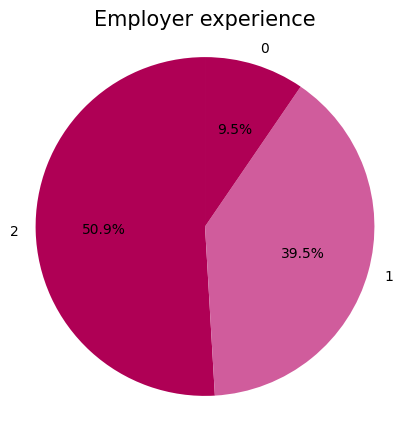

In [23]:
plt.figure(figsize=(8, 5))
plt.title('Employer experience', fontsize=15)
plt.pie(df_job['level'].value_counts(), 
        labels=df_job['level'].value_counts().keys(),
        textprops={"fontsize":10},
        radius=1.1, startangle=90,
        colors=['#af0055', '#D05C9C'],
        autopct='%.1f%%')
plt.show()

**COMMENT:**

**MEANING:**

### Question 2: Top 5 most popular skills

In [24]:
recruit = df_job_raw.sum(axis=0)
#recruit.sort_values(ascending=True,na_position='last')
recruit.drop(labels=['level','salary']).sort_values(ascending=False)[:5]

java       416
reactjs    245
python     220
nodejs     210
php        193
dtype: object

In [25]:

df_job

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,average_salary
0,1,0,0,0,0,0,0,0,0,0,0,0,1500.0
1,1,0,0,0,0,0,0,0,0,0,0,0,1750.0
2,1,0,0,0,1,0,0,0,0,0,0,0,1000.0
3,1,0,0,0,0,0,0,0,0,0,0,0,1500.0
4,1,0,0,0,0,0,0,0,0,0,1,0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,0,0,0,0,0,0,0,0,0,1,2,2000.0
373,0,0,0,0,0,0,0,0,0,0,1,2,1680.0
374,0,0,0,0,0,0,0,0,0,0,1,2,3000.0
375,0,0,0,0,0,0,0,0,0,0,1,2,1750.0


### Question 3: Shows the degree of correlation between two factors "level" and "average_salary"  ?

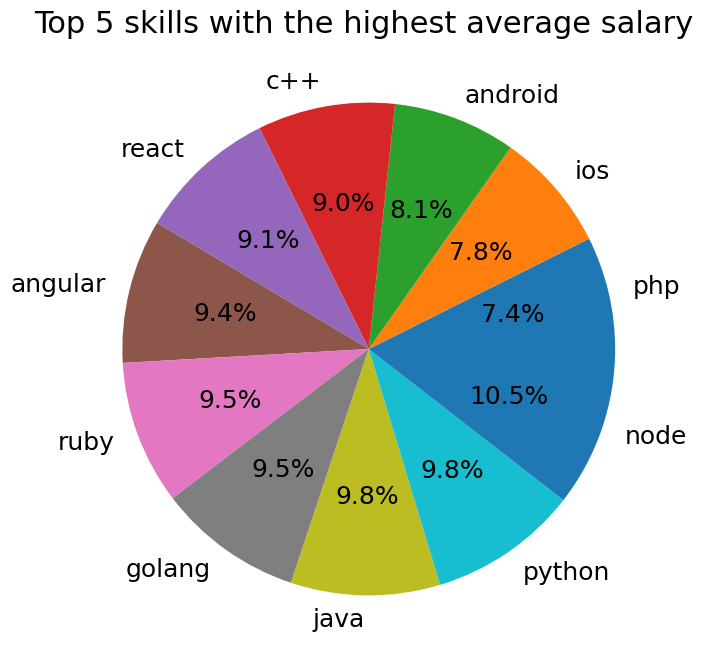

In [39]:
java_fresher = df_job[df_job["java"] == 1]["average_salary"].mean()
node_fresher = df_job[df_job["nodejs"] == 1]["average_salary"].mean()
react_fresher = df_job[df_job["reactjs"] == 1]["average_salary"].mean()
ruby_fresher = df_job[df_job["ruby"] == 1]["average_salary"].mean()
android_fresher = df_job[df_job["android"] == 1]["average_salary"].mean()
ios_fresher = df_job[df_job["ios"] == 1]["average_salary"].mean()
php_fresher = df_job[df_job["php"] == 1]["average_salary"].mean()
python_fresher = df_job[df_job["python"] == 1]["average_salary"].mean()
c_fresher = df_job[df_job["c++"] == 1]["average_salary"].mean()
golang_fresher = df_job[df_job["golang"] == 1]["average_salary"].mean()
angular_fresher = df_job[df_job["angular"] == 1]["average_salary"].mean()
data = {'java': java_fresher, 'node': node_fresher, 'react': react_fresher,
        'ruby': ruby_fresher, 'android': android_fresher, 'ios': ios_fresher, 'php': php_fresher, "c++": c_fresher,
       'python': python_fresher, 'golang': golang_fresher, 'angular': angular_fresher }
Total_Salaries = {'Skill':data.keys(),'Total Salary' : data.values()}
df = pd.DataFrame(Total_Salaries)
df
bn = df.groupby('Skill')['Total Salary'].sum()
bn
ratio = bn.sort_values()

ax = ratio.plot.pie(figsize=(8, 8),autopct='%1.1f%%',title ='asd',fontsize = 18)
ax.set_ylabel('');
ax.set_title('Top 5 skills with the highest average salary ',fontsize =22);

### Question 4: Top 5 skills with the highest average salary  ?

In [27]:
lst =[]
for i in range(len(df_job.columns)-2):
    agg = df_job.groupby(df_job.columns[i])['average_salary'].agg(['mean']).reset_index()
    lst.append(agg['mean'][1])
type(lst)

data=pd.Series(lst,index =['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular'])
data.sort_values(ascending=False)[:5]

nodejs    1915.740741
python    1788.883929
java      1784.728682
golang    1737.500000
ruby      1722.727273
dtype: float64

### Question 5: Average salary of each level ?

In [28]:
salary_fresher = df_job[df_job["level"] == 0]["average_salary"].mean()
salary_junior = df_job[df_job["level"] == 1]["average_salary"].mean()
salary_senior = df_job[df_job["level"] == 2]["average_salary"].mean()

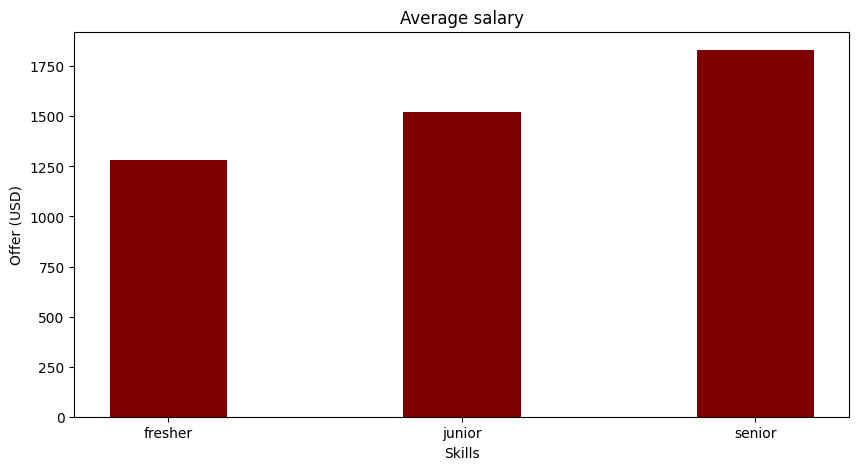

In [29]:
data = {'fresher': salary_fresher, 'junior': salary_junior, 'senior': salary_senior}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Skills")
plt.ylabel("Offer (USD)")
plt.title("Average salary")
plt.show()

**COMMENT:**

**MEANING:**

### Question 6: For each skill, how will the levels be distributed?

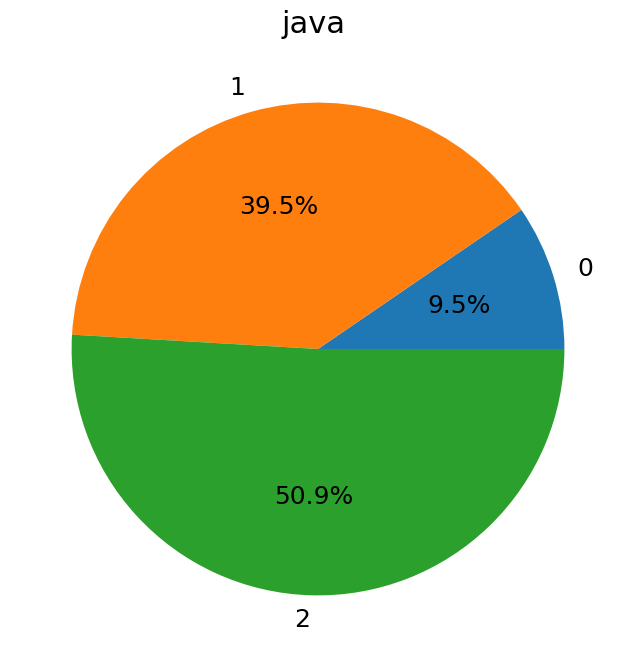

In [30]:
ax= df_job.groupby('level')["java"].count().plot.pie(figsize=(8, 8),autopct='%1.1f%%',title ='asd',fontsize = 18)
ax.set_ylabel('');
ax.set_title('java ',fontsize =22);

### Question 7: What is the average salary of each skill for "fresher" level?

In [31]:
def job_description_by_level(level):
    return df_job[ df_job["level"] == level ]

In [32]:
def average_salary_each_skill_by_level(level):
    job_by_level = job_description_by_level(level)
    
    java_salary = job_by_level[job_by_level["java"] == 1]["average_salary"].mean()
    node_salary = job_by_level[job_by_level["nodejs"] == 1]["average_salary"].mean()
    react_salary = job_by_level[job_by_level["reactjs"] == 1]["average_salary"].mean()
    ruby_salary = job_by_level[job_by_level["ruby"] == 1]["average_salary"].mean()
    android_salary = job_by_level[job_by_level["android"] == 1]["average_salary"].mean()
    ios_salary = job_by_level[job_by_level["ios"] == 1]["average_salary"].mean()
    php_salary = job_by_level[job_by_level["php"] == 1]["average_salary"].mean()
    python_salary = job_by_level[job_by_level["python"] == 1]["average_salary"].mean()
    c_salary = job_by_level[job_by_level["c++"] == 1]["average_salary"].mean()
    golang_salary = job_by_level[job_by_level["golang"] == 1]["average_salary"].mean()
    angular_salary = job_by_level[job_by_level["angular"] == 1]["average_salary"].mean()
    
    
    data = {'java': java_salary, 'node': node_salary, 'react': react_salary,
        'ruby': ruby_salary, 'android': android_salary, 'ios': ios_salary, 'php': php_salary, "c++": c_salary,
       'python': python_salary, 'golang': golang_salary, 'angular': angular_salary }
    
    

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))


    # creating the bar plot
    plt.bar(courses, values, color ='maroon',
            width = 0.4)

    plt.xlabel("Skills")
    plt.ylabel("Offer (USD)")
    plt.title("Average salary for fresher")
    plt.show()

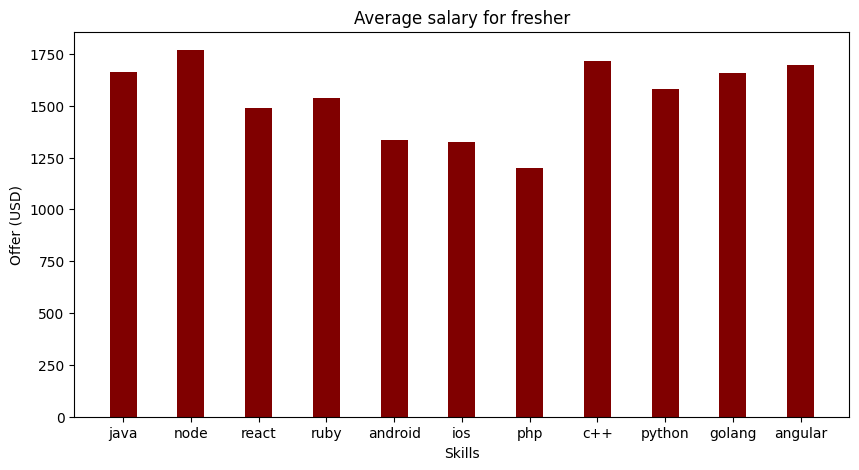

In [33]:
average_salary_each_skill_by_level(1)

## 3. Salary prediction 

### Select group X and Y

In [34]:
X = df_job[['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular', 'level']]
Y = df_job[["average_salary"]]

### Predict model function 

In [35]:
def predict_model(x, y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

    mlr = LinearRegression()  
    mlr.fit(x_train, y_train)

    print("Intercept: ", mlr.intercept_)
    print("Coefficients:", mlr.coef_)


### Calculate the intercept and coefficients of model 

In [36]:
predict =  predict_model(X, Y)

Intercept:  [1263.4428963]
Coefficients: [[ 175.6529022   212.59384509   45.91362516  377.93722738  -53.69165589
  -235.89592863 -291.13713511  148.7117768    25.64951729  255.85638916
   141.64186564  220.96288491]]


In [37]:
def predict_specific_salary_base(java, node, react, ruby, android, ios, php, python, c, golang, angular, level):
    return 1263.4428963 
    + (175.6529022)*java 
    + (212.59384509)*node
    + (45.91362516)*react 
    + (377.93722738)*ruby 
    + (-53.69165589)*android 
    + (-235.89592863)*ios 
    + (-291.13713511)*php
    + (148.7117768)*python 
    + (25.64951729)*c
    + (255.85638916)*golang 
    + (141.64186564)*angular
    + (220.96288491)*level

### Prediction test in practice 

In [38]:
# Student has this skills (java, php, react) level fresher
predict_specific_salary_base(1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0)

1263.4428963